# Wordcloud 
#### 텍스트 데이터에서 단어들의 빈도수를 보여주는 그림
  -  특정 단어가 그 텍스트에서 많이 언급될수록 그 단어는 워드클라우드 안에서 더 크고 두껍게 나타남. 
  - 워드클라우드는 잘 모르겠는 텍스트 데이터의 주제를 파악하는 데 도움이 된다.

###### Reference: 
Amueller's github - https://amueller.github.io/word_cloud/index.html
<br>
Coursera 강의 Data Visualization with Python (by IBM) - https://www.coursera.org/learn/python-for-data-visualization/

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 
np.set_printoptions(threshold=np.nan)

## Wordcloud module 설치 / 다운로드 및 text data 준비

1. cmd에 conda install -c conda-forge wordcloud=1.3
2. python shell에서 import wordcloud -> 성공!

설치에 실패하거나, import wordcloud했을 때 실패한다면 (DLL load failed 에러),
1. conda remove pillow
2. conda install -c conda-forge wordcloud=1.3
3. python shell에서 import wordcloud -> 성공!

In [2]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS as stopwords

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [3]:
alice_text=open("alice_novel.txt","r").read()

## wordcloud 만들기

In [5]:
#Alice text의 워드클라우드를 만드는 WordCloud 클래스의 인스턴스 생성(create)

alicewc = WordCloud(background_color="white",
                  collocations=True, #whether to include collocations of two words
                  stopwords=stopwords)

#alice_novel이라는 텍스트 데이터를 사용하여 wordcloud을 generate하기
alicewc.generate(alice_text)

In [7]:
alicewc.words_ #각 word의 frequency을 볼 수 있음. 
# #이때 collocations=True 이면 said King, said Hatter 같이 
# #자주 나타나는 단어는 하나의 어구로 분류됨.

## 만들어진 wordcloud을 시각화하기

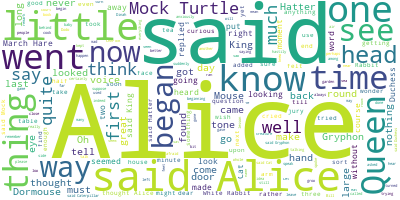

In [7]:
alicewc.to_image()

In [ ]:
#워드클라우드를 이미지로 저장하기
alicewc.to_file("my_alice.png") #jpg등 다른 포맷도 가능

####  
소설 속에서 가장 많이 나온 단어들은 Alice, said, little 정도.

빈도수가 더 적은 단어들을 보기 위해서는 워드클라우드의 사이즈를 조정해주면 됨

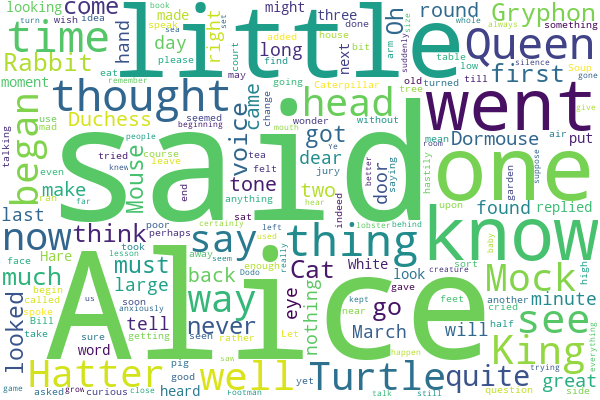

In [8]:
alicewc = WordCloud(background_color="white",
                  collocations=False, #whether to include collocations of two words
                  stopwords=stopwords,
                    width=600, height=400)

#alice_novel이라는 텍스트 데이터를 사용하여 wordcloud을 generate하기
alicewc.generate(alice_text)
alicewc.to_image()

#디폴트 사이즈와 비교

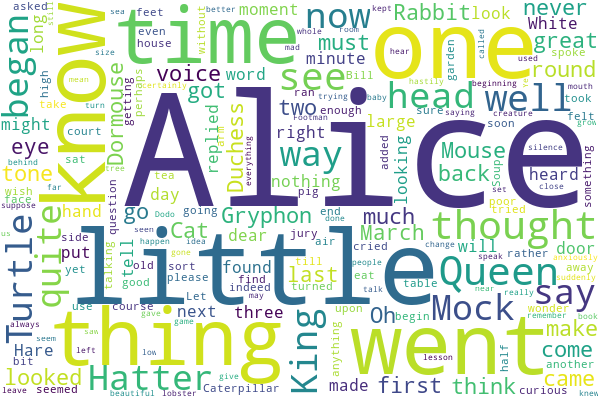

In [12]:
stopwords.add("said")


alicewc.generate(alice_text)
alicewc.to_image()

## 워드클라우드의 색깔을 바꿔보자
<br>
 https://matplotlib.org/examples/color/colormaps_reference.html
 <br>
 https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud<br>https://www.rapidtables.com/web/color/RGB_Color.html


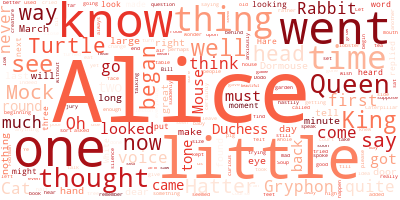

In [13]:
#colormap을 지정하는 방법

alicewc = WordCloud(background_color="white",
                  collocations=False,
                  stopwords=stopwords,
                   colormap="Reds") 

alicewc.generate(alice_text)
alicewc.to_image()

In [14]:
#color_func 파라미터 활용하는 방법

def my_color_func(*args, **kwargs):
    #print(args, kwargs)
    font_size = kwargs['font_size']
    if font_size > 50:
        return "rgb(204,0,102)"
    elif font_size > 20:
        return "rgb(255,51,153)"
    else:
        return "rgb(255,153,204)"

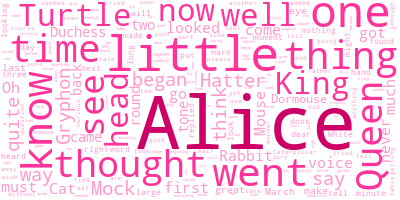

In [15]:
alicewc = WordCloud(background_color="white",
                  collocations=False,
                  stopwords=stopwords,
                   color_func=my_color_func)

#alice_novel이라는 텍스트 데이터를 사용하여 wordcloud을 generate하기
alicewc.generate(alice_text)
alicewc.to_image()

## Mask image 위에 워드클라우드 나타내기

### 1) mask image 가져오기 

 - Pillow library을 통해서 image data를 로드할 수 있다. Pillow는 파이썬의 이미징 라이브러리로서 여러 이미지 파일 포맷(png, jpg, jpeg, ...)을 지원하며 다양한 이미지 처리 function을 제공함 (e.g. 썸네일만들기, 다른 이미지 포맷으로 바꾸기 + 이미지 프로세싱)<br><br>
 - 따라서, Pillow library를 통해 마스크 이미지로 사용할 이미지를 가져오고 wordcloud을 generate할 때 mask=해당 마스크 이미지 로 설정하면 됨.<br><br>
https://pillow.readthedocs.io/en/5.2.x/reference/Image.html



In [16]:
from PIL import Image, ImageFilter #모듈

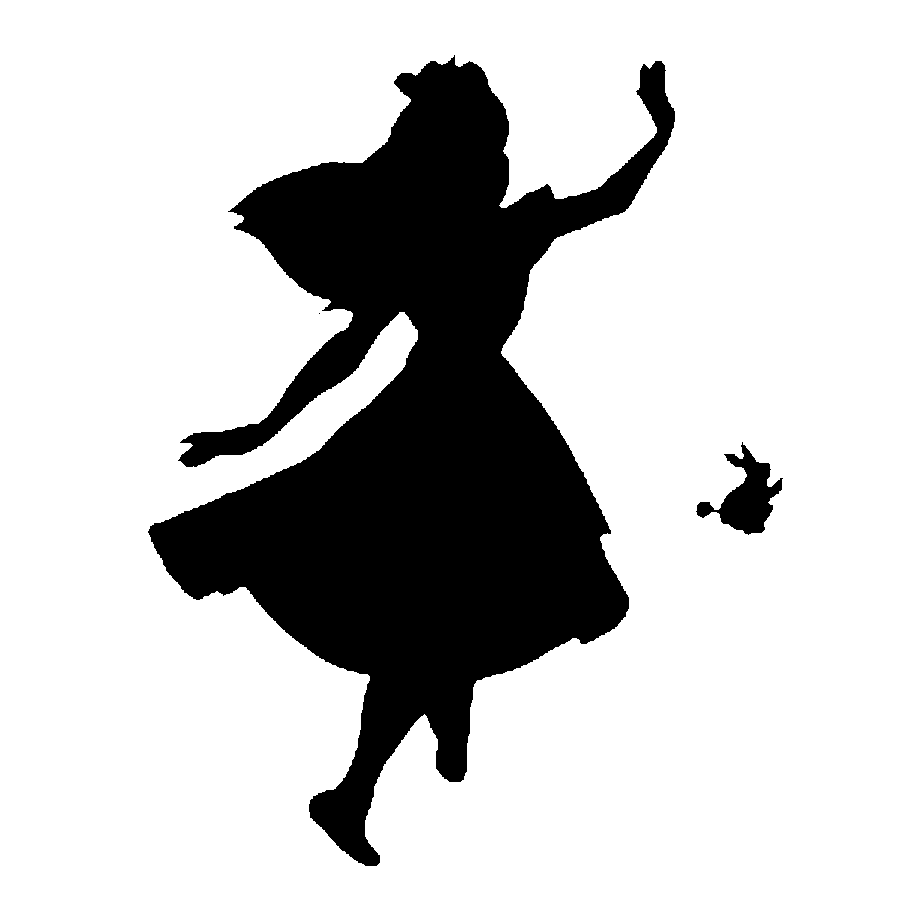

In [17]:
Image.open("alice_mask.png")

In [18]:
type(Image.open("alice_mask.png"))

PIL.PngImagePlugin.PngImageFile

In [19]:
#마스크 이미지로 쓰기 위해 np.array 형태로 변환

mask_array=np.array(Image.open("alice_mask.png"))

#cf)Image.open("alice_mask.png")

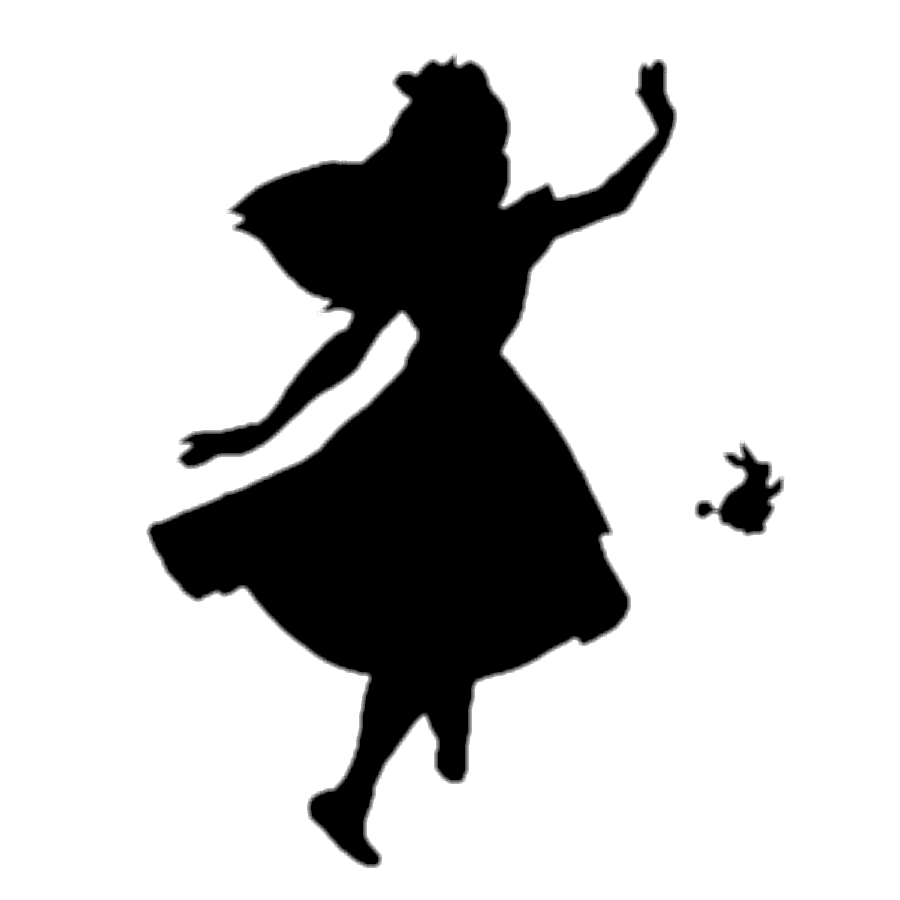

In [24]:
##Pillow 패키지의 Image, ImageFilter 모듈 잠시 체험하기

#썸네일 만들기
a=Image.open("alice_mask.png")
size=(32,32) #최대 32*32 사이즈의 썸네일 만들기
a.thumbnail(size)
a.save("thumb.jpg")

#이미지 확대/축소하기
Image.open("alice_mask.png").resize((300,500))

#이미지 저장하기
a.save("alicejpg.jpg")

#이미지 필터링
Image.open("alice_mask.png").filter(ImageFilter.BLUR) #CONTOUR : 윤관선만 따오기!

### 2) mask image 위에 wordcloud 만들기

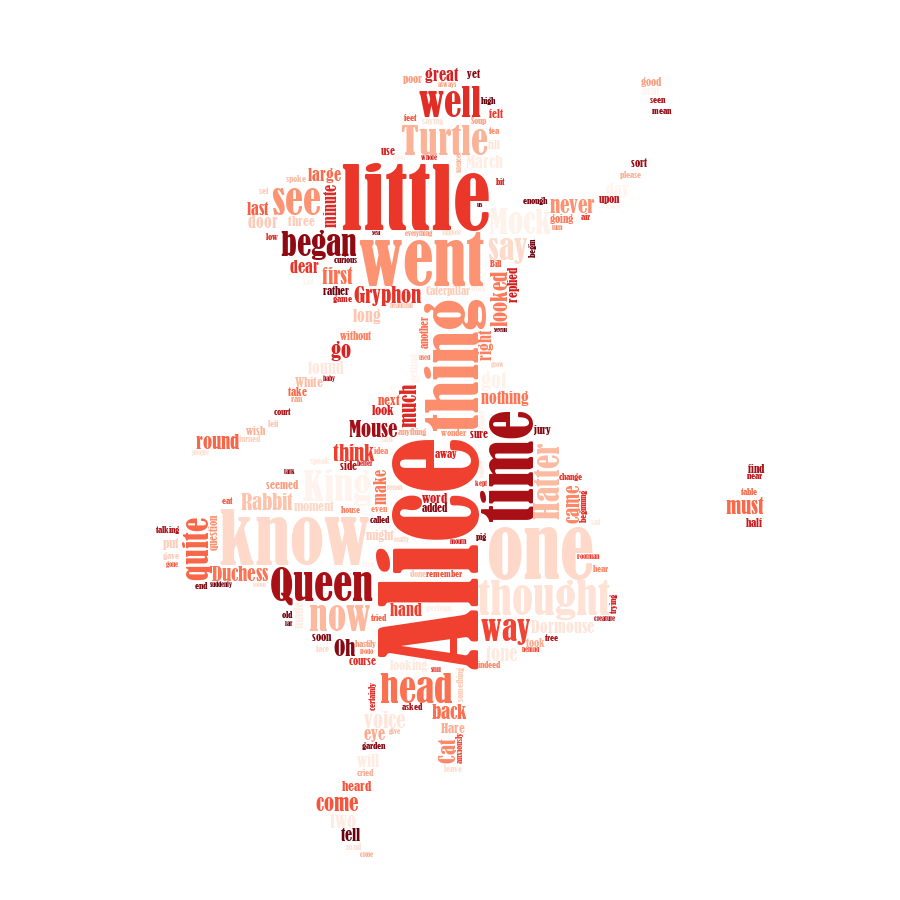

In [26]:
stopwords.add("said")
alice_wc=WordCloud(background_color="white",
                   font_path='C:/Windows/Fonts/Bernhc.ttf', #폰트 경로를 통해 폰트 설정(이 폰트 없으면 오류남), 
                   mask=mask_array,
                   collocations=False,
                   min_font_size=2, #default = 4, 작게 하면 더 많은 단어를 담을 수 있음
                   colormap="Reds",
                   stopwords=stopwords) #said가 포함된 stopwords을 적용함

#alice_novel 텍스트를 사용하여 word cloud generate하기
alice_wc.generate(alice_text)

#wordcloud을 시각화하기
alice_wc.to_image()

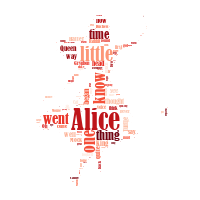

In [28]:
smaller_alice_array = np.array(Image.open("alice_mask.png").resize((200, 200)))

alice_wc2=WordCloud(background_color="white",
                   font_path='C:/Windows/Fonts/Bernhc.ttf', #폰트 경로를 통해 폰트 설정(이 폰트 없으면 오류남), 
                   mask=smaller_alice_array,
                   collocations=False,
                   min_font_size=1, #default = 4, 작게 하면 더 많은 단어를 담을 수 있음
                   colormap="Reds",
                   stopwords=stopwords) #said가 포함된 stopwords을 적용함

#alice_novel 텍스트를 사용하여 word cloud generate하기
alice_wc2.generate(alice_text)

#wordcloud을 시각화하기
alice_wc2.to_image()

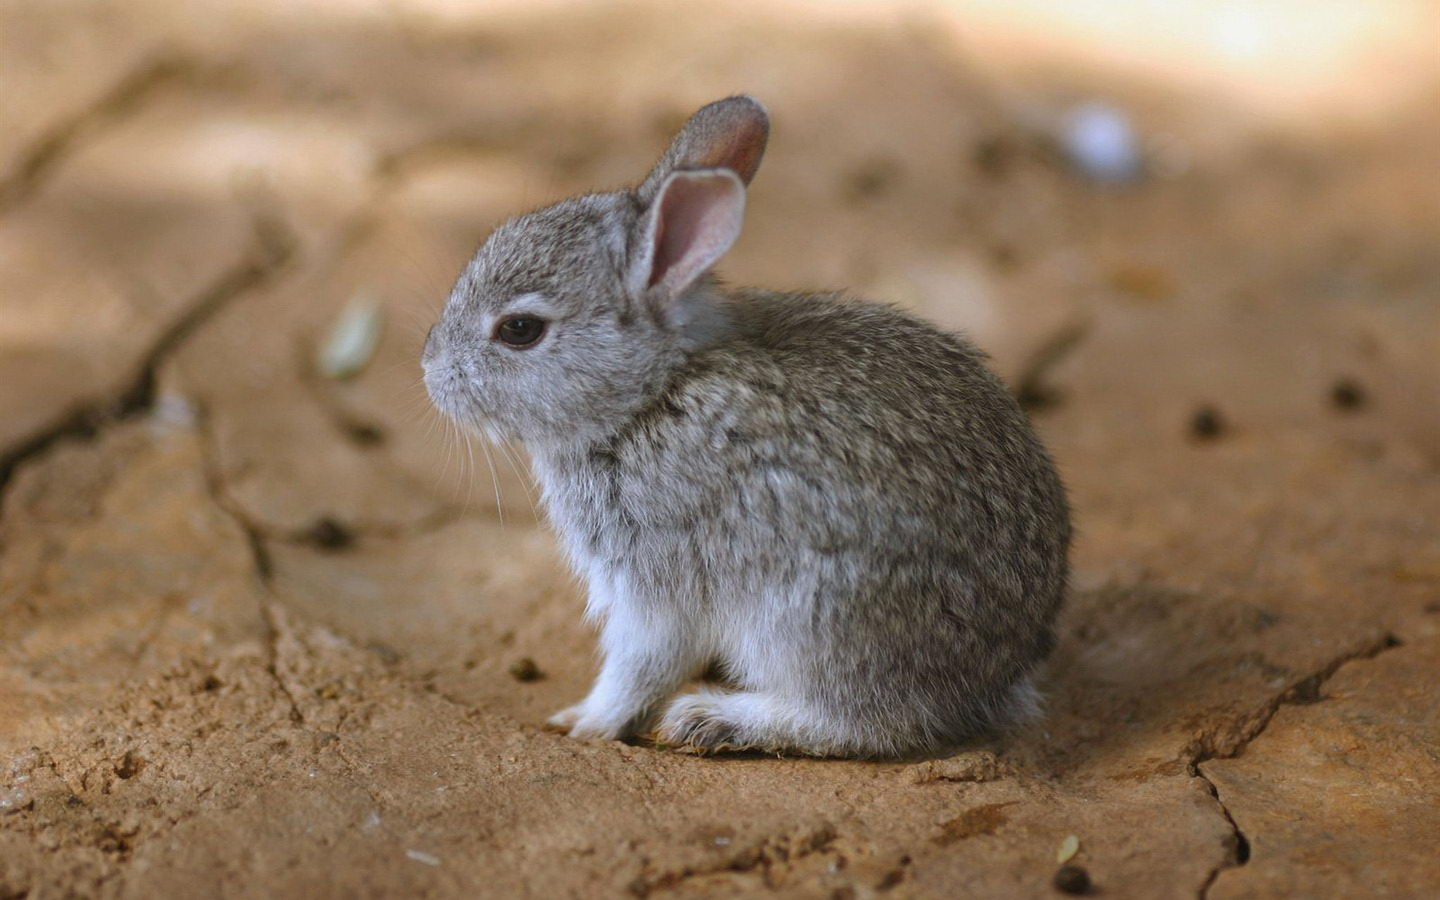

In [29]:
#과연 아무 이미지나 다 마스크 이미지로 쓰일 수 있을까요?

rabbit = Image.open("rabbit.jpeg")
rabbit_array = np.array(rabbit)
rabbit

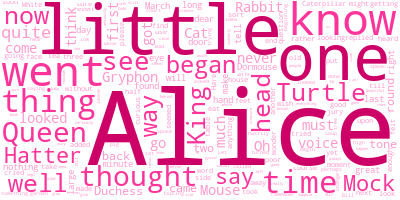

In [30]:
alicewc3=WordCloud(background_color="white",
                 
                 
                 #여러분이 직접 파라미터를 채워보세요
                  #mask, colormap, stopwords 등등...
                  
                 
                 ) 

#alice_novel 텍스트를 사용하여 word cloud generate하기
alicewc.generate(alice_text)
alicewc.to_image()

## 한글로 워드클라우드 만들기

### 1) 텍스트 전처리

In [38]:
import konlpy
from konlpy.tag import Twitter #KoNLPy라는 패키지에서 Okt 클래스 가져옴

In [39]:
Twitter = Twitter()

In [1]:
# 대한민국 헌법 말뭉치 가져오기
text=open("korcon.txt", encoding="utf-8").read()

In [2]:
# 헌법에서 명사들만 추출해오기
tokens_noun=Twitter.nouns(text)

In [3]:
# 워드클라우드에 넣지 않을 단어들을 stopwords로 지정해주고, tokens_noun에서 그 단어들 제외해주기
stopwords=["제","월","일","조","때","그","이","및","안","바","수","것","정","밖"]
tokens_noun=[each for each in tokens_noun if each not in stopwords]

In [4]:
from collections import Counter
#명사의 빈도수 추출
Counter(tokens_noun).most_common(500)

In [5]:
nouns_dict = dict(Counter(tokens_noun).most_common(1000))

### 2) 워드클라우드 시각화하기

In [47]:
#matplotlib에서 한글 표현하기 (윈도우)

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) #사용하고자 하는 폰트 경로를 찾아서 적기


#맥에서 한글 폰트 설정하기

# tempText = "서울 대전 광주 부산"
# tempWc = WordCloud(background_color = "white",
#                    collocations=False,
#                    font_path="/Library/Fonts/AppleGothic.ttf"
#                   )
# tempWc.generate(tempText).to_image()

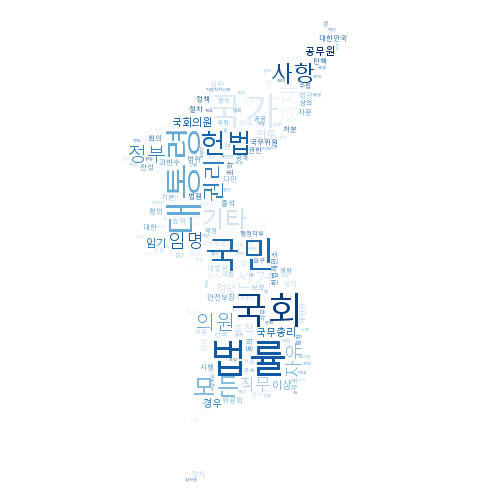

In [48]:
#대한민국 지도 위에 워드클라우드 그리기

wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                   background_color="white",
                    mask=np.array(Image.open("koreanmap.png")),
                    colormap="Blues",
                    
                    relative_scaling=0.2, # 빈도수 or 랭킹 을 고려할지!! 모르겠으면 위에 찾아서 보기!!
                    max_font_size=40
                   ).generate_from_frequencies(nouns_dict) 


wordcloud.to_image()

 
<br>
<br>


## Dataframe으로부터 텍스트 데이터를 추출하여 워드 클라우드 만들어보기 

https://www.coursera.org/learn/python-for-data-visualization/ 의 exercise


In [32]:
df=pd.read_csv("immigration.csv")
df=df.set_index("Country")
df.head(10)

#data 설명 : 1980~2013 매 해 캐나다로 이민 온 사람들을 국적별로 분류한 dataframe
    #Continent : 해당 국가가 위치한 대륙
    #Region : 세분화된 지역 분류
    #DevName : 해당 국가가 개도국인지 선진국인지

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [33]:
#총 이민자 수 :
total_immigration =int(df["Total"].sum())
total_immigration

6409153

### 1) Text data 만들기

각 국적국이 전체에서 차지하는 비중만큼 텍스트에 그 국가의 이름을 포함시키자.
(900 단어 길이의 텍스트를 만들 예정!)

In [6]:
max_words = 900
txt = ''
for country in df.index.values:
    # 국가이름이 한 단어인 국가들만 보겠습니다^^
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df.loc[country, 'Total']/float(total_immigration)*max_words)
        txt = txt + ((country + ' ') * repeat_num_times)
                                     
#이러면 (900 * 전체 immigrants 중 각 국가의 국민이 차지하는 비중) >= 1 이상인 국가만 뜹니다.

### 2) Wordcloud 만들기

In [35]:
im_wordcloud=WordCloud(background_color="white", collocations=False).generate(txt)

print("Word Cloud created.")

Word Cloud created.


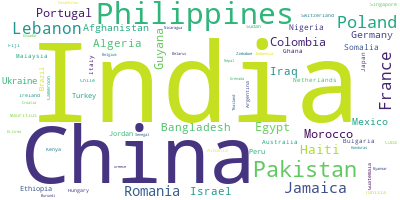

In [36]:
im_wordcloud.to_image()

#역시 중국 인도의 비중이 큼을 알 수 있음.

In [37]:
print("India total : ", df.loc["India","Total"])
print("China total : ", df.loc["China","Total"])

India total :  691904
China total :  659962
